# Aircraft orientation in the three-dimensional space

## Euler angles

Aircraft orientation in space is typically modeled using three angles: heading, elevation, and roll. This is also known as Euler angles. 

- **Heading** $\psi$ is the angle between the aircraft's longitudinal axis (front to back) and the North, measured in the horizontal plane. It represents the aircraft's left or right direction.
- **Elevation** $\theta$ is the angle between the aircraft's longitudinal axis and the horizontal plane. It represents the aircraft's up or down direction.
- **Roll** $\phi$ is the rotation around the aircraft's longitudinal axis. It represents the aircraft's tilt to the left or right.

These angles are used to define the aircraft's orientation in a 3D space. They are crucial for navigation, control systems, and flight dynamics. 

In addition to Euler angles, there are other methods to represent orientation such as quaternions and direction cosine matrices. These methods can help to avoid certain issues like gimbal lock that can occur with Euler angles. 

It's important to note that the modeling of aircraft orientation is a complex topic that involves various aspects of physics, mathematics, and engineering.

## Initialize MATLAB

In [13]:
clearvars; close all; clc

% make the functions in this work directory available to matlab
current_dir = pwd;
addpath(genpath(current_dir));

## Load a 3D model

In [14]:
% use this factor to scale the shape
shapeScaleFactor = 1.0;

% load shape from .stl file
% [V, F, C] = loadAircraftSTL('aircraft_pa24-250.stl', scale_factor);
% save shape in .mat format for future use
% shape.V = V; shape.F = F; shape.C = C;
% save('aircraft_pa24-250.mat', 'shape');

% load shape from .mat file
shape = loadAircraftMAT('aircraft_pa24-250.mat', shapeScaleFactor);

% Display shape
fprintf('Displaying aircraft shape struct...\n');
shape

Displaying aircraft shape struct...


shape = struct with fields:
    V: [12495x3 double]
    F: [4165x3 double]
    C: [12495x1 double]

## Display the shape object with body axes

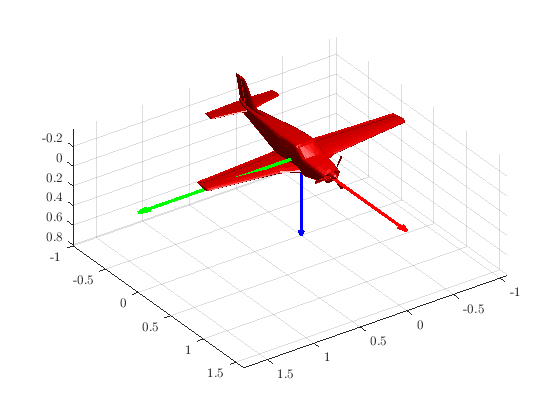

In [15]:
%% Setup the figure/scene
h_fig1 = figure(1);

grid on; hold on;
light('Position',[1 0 -2],'Style','local');

% Trick to have Ze pointing downward and correct visualization
set(gca,'XDir','reverse');
set(gca,'ZDir','reverse');
%set(gca,'Color','none')

%% Display aircraft shape
p = patch('faces', shape.F, 'vertices' ,shape.V);
set(p, 'facec', [1 0 0]);          
set(p, 'EdgeColor','none');
theView = [-125 30];
view(theView);
axis equal;
lighting phong
hold on

%% Plot axes
xMax = 1.8*max(abs(shape.V(:,1)));
yMax = 1.8*max(abs(shape.V(:,2)));
zMax = 0.5*xMax;
quiver3( ...
    0,0,0, ...
    xMax,0,0, ...
    'r','linewidth',2.5 ...
); hold on;
quiver3( ...
    0,0,0, ...
    0,yMax,0, ...
    'g','linewidth',2.5 ...
); hold on;
quiver3( ...
    0,0,0, ...
    0,0,zMax, ...
    'b','linewidth',2.5 ...
); hold on;